## Deep learning for computer vision

In [39]:
from keras import layers
from keras import models
import numpy as np
from matplotlib import pyplot as plt

In [13]:
def build():
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)))
    model.add(layers.MaxPool2D((2,2)))
    model.add(layers.Conv2D(64, (3,3), activation='relu'))
    model.add(layers.MaxPool2D((2,2)))
    model.add(layers.Conv2D(64, (3,3), activation='relu'))
    
    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))
    return model

In [14]:
model = build()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                36928     
__________

In [16]:
32*3*3 + 32, (3*3*32)*64+64, 576*64 + 64

(320, 18496, 36928)

In [33]:
from keras.datasets import mnist
from keras.utils import to_categorical

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [34]:
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype(np.float32) / 256

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype(np.float32) / 256

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [37]:
from keras import backend
backend.tensorflow_backend._get_available_gpus()

['/job:localhost/replica:0/task:0/device:GPU:0']

In [35]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=5, batch_size=64)

Epoch 1/5
60000/60000 [==============================] - 8s 128us/step - loss: 0.1790 - acc: 0.9438
Epoch 2/5
60000/60000 [==============================] - 7s 121us/step - loss: 0.0479 - acc: 0.9851
Epoch 3/5
60000/60000 [==============================] - 7s 121us/step - loss: 0.0332 - acc: 0.9900
Epoch 4/5
60000/60000 [==============================] - 7s 122us/step - loss: 0.0244 - acc: 0.9924
Epoch 5/5
60000/60000 [==============================] - 7s 123us/step - loss: 0.0197 - acc: 0.9943


In [38]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test: Accuracy: {test_acc} Loss: {test_loss}')

10000/10000 [==============================] - 1s 100us/step
Test: Accuracy: 0.9913 Loss: 0.027452499351812


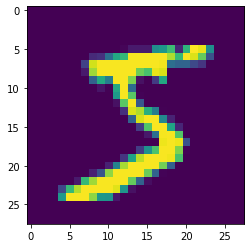

In [41]:
plt.imshow(train_images[0].reshape(28,28))

In [73]:
def max_pooling(input_array):
    output_array = np.zeros((26, 26))
    for i in range(0, 28, 2):
        for j in range(0, 28, 2):
            output_array[i//2, j//2] = np.max(input_array[i:i+2, j:j+2])
            output_array[12+i//2, 12+j//2] = np.mean(input_array[i:i+2, j:j+2])
    return output_array

In [74]:
ori_img = train_images[0].reshape(28,28)
filtered_img = max_pooling(ori_img)


In [69]:
filtered_img.shape

(26, 26)

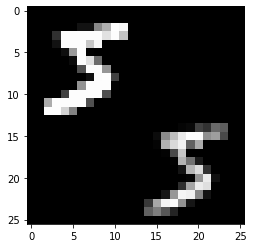

In [71]:
plt.imshow(filtered_img, cmap='gray')

使用maxpooling， 可以用来抓住图像中的主要信息

array([[5.2459152e-12, 9.1488328e-09, 1.2515447e-12, 3.4405168e-02,
        2.1458514e-12, 9.6559483e-01, 1.6057852e-10, 9.9722619e-10,
        2.9862690e-08, 7.9635170e-09]], dtype=float32)

In [104]:
sample = train_images[0].reshape(1,28,28,1)

In [111]:
trans_sample = np.roll(sample, shift=4, axis=2)

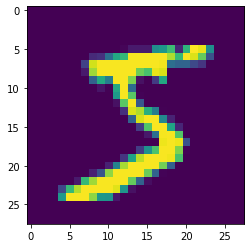

In [120]:
plt.imshow(sample[0].reshape((28,28)))

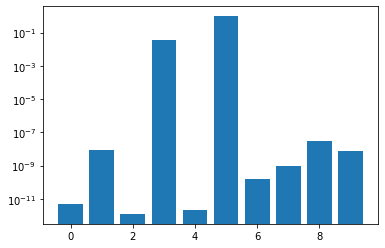

In [122]:
plt.bar(range(10), model.predict_proba(train_images[0].reshape(1,28,28,1))[0], log=True)
plt.show()

array([[1.0903419e-06, 7.1702525e-06, 2.2946216e-08, 1.1262483e-01,
        3.2354519e-09, 8.8735950e-01, 2.9173901e-07, 4.6089258e-06,
        1.8518637e-06, 5.7125391e-07]], dtype=float32)

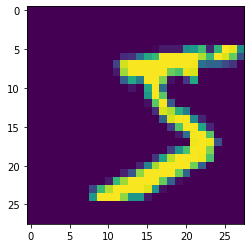

In [115]:
plt.imshow(trans_sample[0].reshape((28,28)))
model.predict_proba(trans_sample.reshape(1,28,28,1))

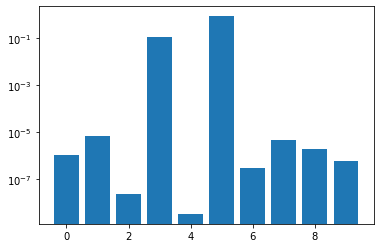

In [123]:
plt.bar(range(10), model.predict_proba(trans_sample.reshape(1,28,28,1))[0], log=True)
plt.show()

# Computer version

In [125]:
! kaggle competitions download -c dogs-vs-cats

'kaggle' n’est pas reconnu en tant que commande interne
ou externe, un programme exécutable ou un fichier de commandes.


In [126]:
!explorer .